# Neural Networks with EMNIST

Get familiar with using creating a neural network and adjusting parameters. 
This notebook uses the EMNIST dataset containing thousands of letters to build a machine learning model.

This code is from a YouTube Tutorial by CrashCourse in their AI Series. 
The episode that this code is from is "How to make an AI read your handwriting (LAB) 
: Crash Course Ai #5" 

The video is linked below

https://www.youtube.com/watch?v=6nGCGYWMObE

## Import EMNIST library from git

Access the EMNIST dataset from GitHub and import it.

In [1]:
!git clone https://github.com/sorki/python-mnist
!./python-mnist/bin/mnist_get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

Cloning into 'python-mnist'...
'.' is not recognized as an internal or external command,
operable program or batch file.


                                              0.0/77.1 kB ? eta -:--:--
     -------------------------------------    71.7/77.1 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 77.1/77.1 kB 1.1 MB/s eta 0:00:00
Imported the EMNIST libraries we need!


## Train and Test

Separate the data into training and testing data. 

Training data contains 60,000 data points and another 10,000 points to test with. 
The features are the pixel values and the targets is the letter the pixels represent.

In [2]:
# Grab the data from the OpenML website
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# There is one other thing we need to do, we need to
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


### View sample image

Open a random image from the training set and view it. 
Help get a better understanding of what the images look like.

Image Label: m


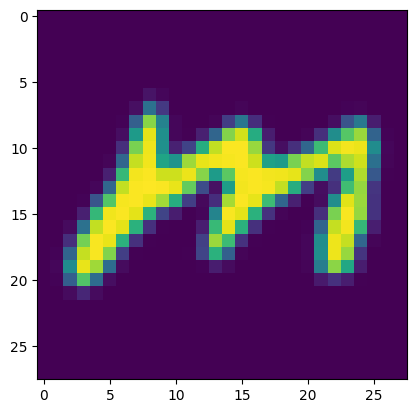

In [3]:
import matplotlib.pyplot as plt

img_index = 14000 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

## Modeling

Create and evaluate machine learning models.

### 1-Layer, 50-neuron, 50-epoch

A 1-layer neural network with 50 neurons and 50 epochs

In [4]:
# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


The model's accuracy is 0.84 on the testing set.

In [5]:
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732


C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.886500
Test set score: 0.840800


Create a confusion matrix to inspect the letters with the biggest difference between predicted and true values.

In [ ]:
# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

View the cases where the model incorrectly identified 'l's and 'i's.

There were 84 times that the letter i was predicted to be the letter l.


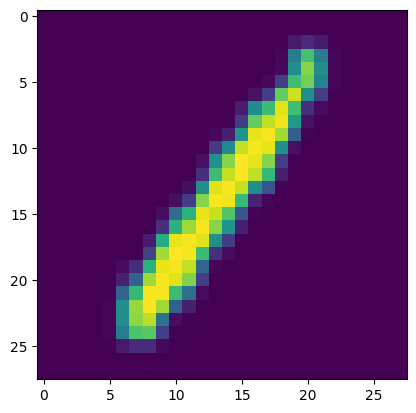

In [7]:
# You can change this to any letters that you think the neural network may have confused...
predicted_letter = 'l'
actual_letter = 'i'


# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

### 5-Layer, 100-neuron, 50-epoch

A 5-layer neural network with 100 neurons and 50 epochs

In [8]:
# Change some of the values in the below statement and re-run to see how they 
# affect performance!
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.15599672
Iteration 2, loss = 0.54834774
Iteration 3, loss = 0.44784035
Iteration 4, loss = 0.39865207
Iteration 5, loss = 0.36308811
Iteration 6, loss = 0.33567397
Iteration 7, loss = 0.31904877
Iteration 8, loss = 0.29485588
Iteration 9, loss = 0.27846574
Iteration 10, loss = 0.26938228
Iteration 11, loss = 0.25802023
Iteration 12, loss = 0.25788282
Iteration 13, loss = 0.24842470
Iteration 14, loss = 0.23652186
Iteration 15, loss = 0.22631113
Iteration 16, loss = 0.22402455
Iteration 17, loss = 0.21873561
Iteration 18, loss = 0.21993938
Iteration 19, loss = 0.21469569
Iteration 20, loss = 0.21052404
Iteration 21, loss = 0.20297180
Iteration 22, loss = 0.20881634
Iteration 23, loss = 0.20199416
Iteration 24, loss = 0.20136205
Iteration 25, loss = 0.19870804
Iteration 26, loss = 0.19468852
Iteration 27, loss = 0.19161935
Iteration 28, loss = 0.19082842
Iteration 29, loss = 0.18859101
Iteration 30, loss = 0.18797075
Iteration 31, loss = 0.19353324
Iteration 32, los

C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.949567
Test set score: 0.889100


### 4-Layer, 100-neuron, 100-epoch

A 4-layer neural network with 100 neurons and 100 epochs

In [9]:
# Change some of the values in the below statement and re-run to see how they 
# affect performance!
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.01379081
Iteration 2, loss = 0.50392966
Iteration 3, loss = 0.41916971
Iteration 4, loss = 0.37202569
Iteration 5, loss = 0.34055321
Iteration 6, loss = 0.31400146
Iteration 7, loss = 0.29491436
Iteration 8, loss = 0.28594488
Iteration 9, loss = 0.27441599
Iteration 10, loss = 0.25836723
Iteration 11, loss = 0.25526800
Iteration 12, loss = 0.23921960
Iteration 13, loss = 0.23775247
Iteration 14, loss = 0.23193747
Iteration 15, loss = 0.22274752
Iteration 16, loss = 0.22223769
Iteration 17, loss = 0.21942345
Iteration 18, loss = 0.21173550
Iteration 19, loss = 0.20685005
Iteration 20, loss = 0.20574863
Iteration 21, loss = 0.20002214
Iteration 22, loss = 0.19976729
Iteration 23, loss = 0.20194026
Iteration 24, loss = 0.20843457
Iteration 25, loss = 0.19250249
Iteration 26, loss = 0.18499905
Iteration 27, loss = 0.19201265
Iteration 28, loss = 0.19276332
Iteration 29, loss = 0.18838018
Iteration 30, loss = 0.19103984
Iteration 31, loss = 0.19097723
Iteration 32, los

### 6-Layer, 100-neuron, 50-epoch

A 6-layer neural network with 100 neurons and 50 epochs

In [10]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.24960417
Iteration 2, loss = 0.57582422
Iteration 3, loss = 0.47712460
Iteration 4, loss = 0.42119700
Iteration 5, loss = 0.37742533
Iteration 6, loss = 0.35172146
Iteration 7, loss = 0.32579139
Iteration 8, loss = 0.31228887
Iteration 9, loss = 0.29365994
Iteration 10, loss = 0.27529740
Iteration 11, loss = 0.26802392
Iteration 12, loss = 0.25236468
Iteration 13, loss = 0.24922883
Iteration 14, loss = 0.24197889
Iteration 15, loss = 0.23588119
Iteration 16, loss = 0.23155045
Iteration 17, loss = 0.22522903
Iteration 18, loss = 0.22597884
Iteration 19, loss = 0.22145803
Iteration 20, loss = 0.21808489
Iteration 21, loss = 0.21427525
Iteration 22, loss = 0.21071625
Iteration 23, loss = 0.20072292
Iteration 24, loss = 0.19746474
Iteration 25, loss = 0.20185190
Iteration 26, loss = 0.19215147
Iteration 27, loss = 0.20082646
Iteration 28, loss = 0.19751645
Iteration 29, loss = 0.19395264
Iteration 30, loss = 0.18737214
Iteration 31, loss = 0.18573401
Iteration 32, los

C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.944833
Test set score: 0.885300


### 3-Layer, 100-neuron, 50-epoch

A 3-layer neural network with 100 neurons and 50 epochs

In [11]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.94567123
Iteration 2, loss = 0.47719782
Iteration 3, loss = 0.39525794
Iteration 4, loss = 0.35000380
Iteration 5, loss = 0.32218087
Iteration 6, loss = 0.29480242
Iteration 7, loss = 0.27962279
Iteration 8, loss = 0.26156196
Iteration 9, loss = 0.24643216
Iteration 10, loss = 0.23951834
Iteration 11, loss = 0.23188084
Iteration 12, loss = 0.22801692
Iteration 13, loss = 0.21724162
Iteration 14, loss = 0.21456462
Iteration 15, loss = 0.20922584
Iteration 16, loss = 0.20420448
Iteration 17, loss = 0.20105150
Iteration 18, loss = 0.19873714
Iteration 19, loss = 0.19204121
Iteration 20, loss = 0.19160648
Iteration 21, loss = 0.20064392
Iteration 22, loss = 0.19757599
Iteration 23, loss = 0.18845715
Iteration 24, loss = 0.18503059
Iteration 25, loss = 0.17863643
Iteration 26, loss = 0.18348528
Iteration 27, loss = 0.18410600
Iteration 28, loss = 0.18448267
Iteration 29, loss = 0.18810097
Iteration 30, loss = 0.18511120
Iteration 31, loss = 0.18215740
Iteration 32, los

C:\Users\taylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.941133
Test set score: 0.878200


### 2-Layer, 100-neuron, 50-epoch

A 2-layer neural network with 100 neurons and 50 epochs

In [12]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.92341903
Iteration 2, loss = 0.47113924
Iteration 3, loss = 0.38867102
Iteration 4, loss = 0.34033358
Iteration 5, loss = 0.31797103
Iteration 6, loss = 0.29433554
Iteration 7, loss = 0.27297637
Iteration 8, loss = 0.25533497
Iteration 9, loss = 0.24492291
Iteration 10, loss = 0.23219130
Iteration 11, loss = 0.22821158
Iteration 12, loss = 0.21875247
Iteration 13, loss = 0.20788412
Iteration 14, loss = 0.19990241
Iteration 15, loss = 0.20067924
Iteration 16, loss = 0.19264319
Iteration 17, loss = 0.18396688
Iteration 18, loss = 0.18335998
Iteration 19, loss = 0.18505259
Iteration 20, loss = 0.17711433
Iteration 21, loss = 0.17423039
Iteration 22, loss = 0.17349865
Iteration 23, loss = 0.17724000
Iteration 24, loss = 0.17587735
Iteration 25, loss = 0.16150978
Iteration 26, loss = 0.15711366
Iteration 27, loss = 0.16454959
Iteration 28, loss = 0.15273586
Iteration 29, loss = 0.16872881
Iteration 30, loss = 0.16765205
Iteration 31, loss = 0.16283669
Iteration 32, los

### 2-Layer, 100-neuron, 100-epoch

A 2-layer neural network with 100 neurons and 100 epochs

In [13]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.92341903
Iteration 2, loss = 0.47113924
Iteration 3, loss = 0.38867102
Iteration 4, loss = 0.34033358
Iteration 5, loss = 0.31797103
Iteration 6, loss = 0.29433554
Iteration 7, loss = 0.27297637
Iteration 8, loss = 0.25533497
Iteration 9, loss = 0.24492291
Iteration 10, loss = 0.23219130
Iteration 11, loss = 0.22821158
Iteration 12, loss = 0.21875247
Iteration 13, loss = 0.20788412
Iteration 14, loss = 0.19990241
Iteration 15, loss = 0.20067924
Iteration 16, loss = 0.19264319
Iteration 17, loss = 0.18396688
Iteration 18, loss = 0.18335998
Iteration 19, loss = 0.18505259
Iteration 20, loss = 0.17711433
Iteration 21, loss = 0.17423039
Iteration 22, loss = 0.17349865
Iteration 23, loss = 0.17724000
Iteration 24, loss = 0.17587735
Iteration 25, loss = 0.16150978
Iteration 26, loss = 0.15711366
Iteration 27, loss = 0.16454959
Iteration 28, loss = 0.15273586
Iteration 29, loss = 0.16872881
Iteration 30, loss = 0.16765205
Iteration 31, loss = 0.16283669
Iteration 32, los

### 2-Layer, 200-neuron, 50-epoch

A 2-layer neural network with 200 neurons and 50 epochs

In [14]:
mlp2 = MLPClassifier(hidden_layer_sizes=(200,200,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.84157388
Iteration 2, loss = 0.41124289
Iteration 3, loss = 0.32685027
Iteration 4, loss = 0.27822481
Iteration 5, loss = 0.24477098
Iteration 6, loss = 0.21631529
Iteration 7, loss = 0.19502451
Iteration 8, loss = 0.17756042
Iteration 9, loss = 0.15924957
Iteration 10, loss = 0.14356044
Iteration 11, loss = 0.13818683
Iteration 12, loss = 0.12896495
Iteration 13, loss = 0.11841989
Iteration 14, loss = 0.11316019
Iteration 15, loss = 0.10580086
Iteration 16, loss = 0.10150027
Iteration 17, loss = 0.09859888
Iteration 18, loss = 0.09059813
Iteration 19, loss = 0.09015529
Iteration 20, loss = 0.08736004
Iteration 21, loss = 0.08290141
Iteration 22, loss = 0.08421612
Iteration 23, loss = 0.07926881
Iteration 24, loss = 0.07811772
Iteration 25, loss = 0.08379352
Iteration 26, loss = 0.08303772
Iteration 27, loss = 0.09512353
Iteration 28, loss = 0.07959204
Iteration 29, loss = 0.08386981
Iteration 30, loss = 0.08447192
Iteration 31, loss = 0.08153120
Iteration 32, los

### 3-Layer, 200-neuron, 50-epoch

A 3-layer neural network with 200 neurons and 50 epochs

In [15]:
mlp2 = MLPClassifier(hidden_layer_sizes=(200,200,200), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.85006833
Iteration 2, loss = 0.42132711
Iteration 3, loss = 0.34014313
Iteration 4, loss = 0.28538280
Iteration 5, loss = 0.25113998
Iteration 6, loss = 0.23027039
Iteration 7, loss = 0.20491522
Iteration 8, loss = 0.18557848
Iteration 9, loss = 0.17633386
Iteration 10, loss = 0.16720570
Iteration 11, loss = 0.15510447
Iteration 12, loss = 0.14226318
Iteration 13, loss = 0.13870009
Iteration 14, loss = 0.13507830
Iteration 15, loss = 0.13196642
Iteration 16, loss = 0.13615208
Iteration 17, loss = 0.12941351
Iteration 18, loss = 0.12493503
Iteration 19, loss = 0.12010820
Iteration 20, loss = 0.11158571
Iteration 21, loss = 0.12005928
Iteration 22, loss = 0.11618404
Iteration 23, loss = 0.12492159
Iteration 24, loss = 0.11358622
Iteration 25, loss = 0.11479737
Iteration 26, loss = 0.11409521
Iteration 27, loss = 0.11565854
Iteration 28, loss = 0.11527723
Iteration 29, loss = 0.12009333
Iteration 30, loss = 0.11039331
Iteration 31, loss = 0.10923919
Iteration 32, los